In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.python.client import device_lib
# GPU 인식 되었는지 확인
# if not tf.config.list_physical_devices('GPU'):
#     print('GPU is not detected!!!')
# else:
#     print('GPU detected!!!\n')
#     print('Device type list:')
#     print(device_lib.list_local_devices())
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
#모든 열 보기
pd.set_option('display.max_columns', None)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
path = 'D:/Dataset/Competitons/Jeju/'
train = pd.read_csv(path + 'train.csv', parse_dates=["base_date"]).copy()
test = pd.read_csv(path + 'test.csv', parse_dates=['base_date'].copy())
origin_train = train.copy()
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


변수명,변수 설명
1. id,아이디
2. base_date,날짜
3. day_of_week,요일
4. base_hour,시간대
5. lane_count,차로수
6. road_rating,도로등급
7. multi_linked,중용구간 여부
8. connect_code,연결로 코드
9. maximum_speed_limit,최고속도제한
10. weight_restricted,통과제한하중
11. hight_restricted,통과제한높이
12. road_type,도로유형
13. start_latitude,시작지점의 위도
14. start_longitude,시작지점의 경도
15. start_turn_restricted,시작 지점의 회전제한 유무
16. end_latitude,도착지점의 위도
17. end_longitude,도착지점의 경도
18. end_turn_restricted,도작지점의 회전제한 유무
19. road_name,도로명
20. start_node_name,시작지점명
21. end_node_name,도착지점명
22. vehicle_restricted,통과제한차량
23. target,평균속도(km)

https://www.law.go.kr/LSW/admRulInfoP.do?admRulSeq=2100000157569

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              datetime64[ns]
 2   day_of_week            object        
 3   base_hour              int64         
 4   lane_count             int64         
 5   road_rating            int64         
 6   road_name              object        
 7   multi_linked           int64         
 8   connect_code           int64         
 9   maximum_speed_limit    float64       
 10  vehicle_restricted     float64       
 11  weight_restricted      float64       
 12  height_restricted      float64       
 13  road_type              int64         
 14  start_node_name        object        
 15  start_latitude         float64       
 16  start_longitude        float64       
 17  start_turn_restricted  object        
 18  end_node_name         

In [5]:
train.head(5)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [6]:
def date_split(df):

    df['year'] = df['base_date'].dt.year
    df['month'] = df['base_date'].dt.month
    df['day'] = df['base_date'].dt.day
    df['quarter'] = df['base_date'].dt.quarter
    df['maximum_speed_limit - lane_count'] = df['maximum_speed_limit'] - df['lane_count']
    df['lane_count * base_hour'] = df['lane_count'] * df['base_hour']
#     df['maximum_speed_limit - (lane_count * base_hour)'] = df['maximum_speed_limit'] - df['lane_count * base_hour']
    df['lane_count - multi_linked'] = df['lane_count'] - df['multi_linked']

    return df
    
train = date_split(train)
test = date_split(test)
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,lane_count - multi_linked
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23,2,59.0,17,1
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28,3,58.0,42,2
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10,4,78.0,14,2
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11,1,48.0,26,2
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5,4,78.0,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4,4,49.0,16,1
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,31,1,78.0,4,2
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13,2,58.0,44,2
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20,4,78.0,4,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 30 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   id                                object        
 1   base_date                         datetime64[ns]
 2   day_of_week                       object        
 3   base_hour                         int64         
 4   lane_count                        int64         
 5   road_rating                       int64         
 6   road_name                         object        
 7   multi_linked                      int64         
 8   connect_code                      int64         
 9   maximum_speed_limit               float64       
 10  vehicle_restricted                float64       
 11  weight_restricted                 float64       
 12  height_restricted                 float64       
 13  road_type                         int64         
 14  start_node_name   

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label = LabelEncoder()
train_label = train.copy()
test_label = test.copy()

cat_features = ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']

for i in cat_features:
    label = LabelEncoder()
    train_label[i] = label.fit_transform(train_label[i])
    test_label[i] = label.transform(test_label[i])

train_label

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,lane_count - multi_linked
0,TRAIN_0000000,2022-06-23,1,17,1,106,46,0,0,60.0,0.0,32400.0,0.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23,2,59.0,17,1
1,TRAIN_0000001,2022-07-28,1,21,2,103,34,0,0,60.0,0.0,0.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28,3,58.0,42,2
2,TRAIN_0000002,2021-10-10,4,7,2,103,36,0,0,80.0,0.0,0.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10,4,78.0,14,2
3,TRAIN_0000003,2022-03-11,0,13,2,107,57,0,0,50.0,0.0,0.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11,1,48.0,26,2
4,TRAIN_0000004,2021-10-05,6,8,2,103,35,0,0,80.0,0.0,0.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5,4,78.0,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,16,1,107,0,0,0,50.0,0.0,0.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4,4,49.0,16,1
4701213,TRAIN_4701213,2022-03-31,1,2,2,107,0,0,0,80.0,0.0,43200.0,0.0,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31,1,78.0,4,2
4701214,TRAIN_4701214,2022-06-13,3,22,2,103,35,0,0,60.0,0.0,0.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13,2,58.0,44,2
4701215,TRAIN_4701215,2021-10-20,2,2,2,103,37,0,0,80.0,0.0,0.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20,4,78.0,4,2


In [9]:
test_label

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,lane_count - multi_linked
0,TEST_000000,2022-08-25,1,17,3,107,32,0,0,70.0,0.0,0.0,0.0,0,163,33.499427,126.541298,0,403,33.500772,126.543837,1,2022,8,25,3,67.0,51,3
1,TEST_000001,2022-08-09,6,12,2,103,35,0,0,70.0,0.0,0.0,0.0,3,412,33.258507,126.427003,0,22,33.258119,126.415840,0,2022,8,9,3,68.0,24,2
2,TEST_000002,2022-08-05,0,2,1,103,36,0,0,60.0,0.0,0.0,0.0,0,97,33.258960,126.476508,0,95,33.259206,126.474687,0,2022,8,5,3,59.0,2,1
3,TEST_000003,2022-08-18,1,23,3,103,34,0,0,70.0,0.0,0.0,0.0,0,262,33.473494,126.545647,0,350,33.471061,126.545467,0,2022,8,18,3,67.0,69,3
4,TEST_000004,2022-08-10,2,17,3,106,12,0,0,70.0,0.0,0.0,0.0,0,153,33.501477,126.569223,0,145,33.496863,126.581230,0,2022,8,10,3,67.0,51,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,5,5,1,103,36,0,0,80.0,0.0,0.0,0.0,0,337,33.472819,126.463030,0,90,33.470483,126.460846,0,2022,8,27,3,79.0,5,1
291237,TEST_291237,2022-08-19,0,20,2,103,34,0,0,60.0,0.0,0.0,0.0,0,287,33.305359,126.598914,0,451,33.300796,126.600332,0,2022,8,19,3,58.0,40,2
291238,TEST_291238,2022-08-05,0,11,1,107,23,0,0,30.0,0.0,0.0,0.0,0,119,33.493624,126.496769,1,437,33.497500,126.496946,1,2022,8,5,3,29.0,11,1
291239,TEST_291239,2022-08-12,0,7,2,107,1,0,0,60.0,0.0,0.0,0.0,0,40,33.254782,126.507014,0,346,33.255659,126.507333,0,2022,8,12,3,58.0,14,2


In [10]:
onehot_features = ['road_rating', 'road_type', 'weight_restricted', 'maximum_speed_limit']

for i in onehot_features:
    onehot = OneHotEncoder(sparse = False)
    train_onehot = onehot.fit_transform(train_label[[i]])
    train_onehot = pd.DataFrame(train_onehot, columns = [i + '_' + str(col) for col in onehot.categories_[0]])
    train_label = pd.concat([train_label.drop(columns = [i]), train_onehot], axis = 1)
    
    test_onehot = onehot.transform(test_label[[i]])
    test_onehot = pd.DataFrame(test_onehot, columns = [i + '_' + str(col) for col in onehot.categories_[0]])
    test_label = pd.concat([test_label.drop(columns = [i]), test_onehot], axis = 1)

train_label

,id,base_date,day_of_week,base_hour,lane_count,road_name,multi_linked,connect_code,vehicle_restricted,height_restricted,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,lane_count - multi_linked,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,weight_restricted_0.0,weight_restricted_32400.0,weight_restricted_43200.0,weight_restricted_50000.0,maximum_speed_limit_30.0,maximum_speed_limit_40.0,maximum_speed_limit_50.0,maximum_speed_limit_60.0,maximum_speed_limit_70.0,maximum_speed_limit_80.0
0,TRAIN_0000000,2022-06-23,1,17,1,46,0,0,0.0,0.0,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23,2,59.0,17,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,TRAIN_0000001,2022-07-28,1,21,2,34,0,0,0.0,0.0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28,3,58.0,42,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TRAIN_0000002,2021-10-10,4,7,2,36,0,0,0.0,0.0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10,4,78.0,14,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,TRAIN_0000003,2022-03-11,0,13,2,57,0,0,0.0,0.0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11,1,48.0,26,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,TRAIN_0000004,2021-10-05,6,8,2,35,0,0,0.0,0.0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5,4,78.0,16,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,16,1,0,0,0,0.0,0.0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4,4,49.0,16,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4701213,TRAIN_4701213,2022-03-31,1,2,2,0,0,0,0.0,0.0,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31,1,78.0,4,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4701214,TRAIN_4701214,2022-06-13,3,22,2,35,0,0,0.0,0.0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13,2,58.0,44,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4701215,TRAIN_4701215,2021-10-20,2,2,2,37,0,0,0.0,0.0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20,4,78.0,4,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
test_label

,id,base_date,day_of_week,base_hour,lane_count,road_name,multi_linked,connect_code,vehicle_restricted,height_restricted,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,lane_count - multi_linked,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,weight_restricted_0.0,weight_restricted_32400.0,weight_restricted_43200.0,weight_restricted_50000.0,maximum_speed_limit_30.0,maximum_speed_limit_40.0,maximum_speed_limit_50.0,maximum_speed_limit_60.0,maximum_speed_limit_70.0,maximum_speed_limit_80.0
0,TEST_000000,2022-08-25,1,17,3,32,0,0,0.0,0.0,163,33.499427,126.541298,0,403,33.500772,126.543837,1,2022,8,25,3,67.0,51,3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TEST_000001,2022-08-09,6,12,2,35,0,0,0.0,0.0,412,33.258507,126.427003,0,22,33.258119,126.415840,0,2022,8,9,3,68.0,24,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TEST_000002,2022-08-05,0,2,1,36,0,0,0.0,0.0,97,33.258960,126.476508,0,95,33.259206,126.474687,0,2022,8,5,3,59.0,2,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,TEST_000003,2022-08-18,1,23,3,34,0,0,0.0,0.0,262,33.473494,126.545647,0,350,33.471061,126.545467,0,2022,8,18,3,67.0,69,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TEST_000004,2022-08-10,2,17,3,12,0,0,0.0,0.0,153,33.501477,126.569223,0,145,33.496863,126.581230,0,2022,8,10,3,67.0,51,3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,5,5,1,36,0,0,0.0,0.0,337,33.472819,126.463030,0,90,33.470483,126.460846,0,2022,8,27,3,79.0,5,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
291237,TEST_291237,2022-08-19,0,20,2,34,0,0,0.0,0.0,287,33.305359,126.598914,0,451,33.300796,126.600332,0,2022,8,19,3,58.0,40,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
291238,TEST_291238,2022-08-05,0,11,1,23,0,0,0.0,0.0,119,33.493624,126.496769,1,437,33.497500,126.496946,1,2022,8,5,3,29.0,11,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
291239,TEST_291239,2022-08-12,0,7,2,1,0,0,0.0,0.0,40,33.254782,126.507014,0,346,33.255659,126.507333,0,2022,8,12,3,58.0,14,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
corr_matrix = train_label.corr()
corr_matrix['target'].sort_values(ascending=False)

target                              1.000000
maximum_speed_limit_80.0            0.469804
maximum_speed_limit - lane_count    0.442913
weight_restricted_43200.0           0.292601
road_rating_103                     0.207988
road_type_3                         0.200840
road_rating_106                     0.166097
road_name                           0.116778
weight_restricted_32400.0           0.067714
connect_code                        0.048348
maximum_speed_limit_40.0            0.047641
end_node_name                       0.039770
start_latitude                      0.036280
end_latitude                        0.036139
start_node_name                     0.029007
weight_restricted_50000.0           0.017022
day_of_week                         0.006397
month                              -0.000225
end_longitude                      -0.001000
start_longitude                    -0.001168
multi_linked                       -0.008408
quarter                            -0.008418
day       

<AxesSubplot:>

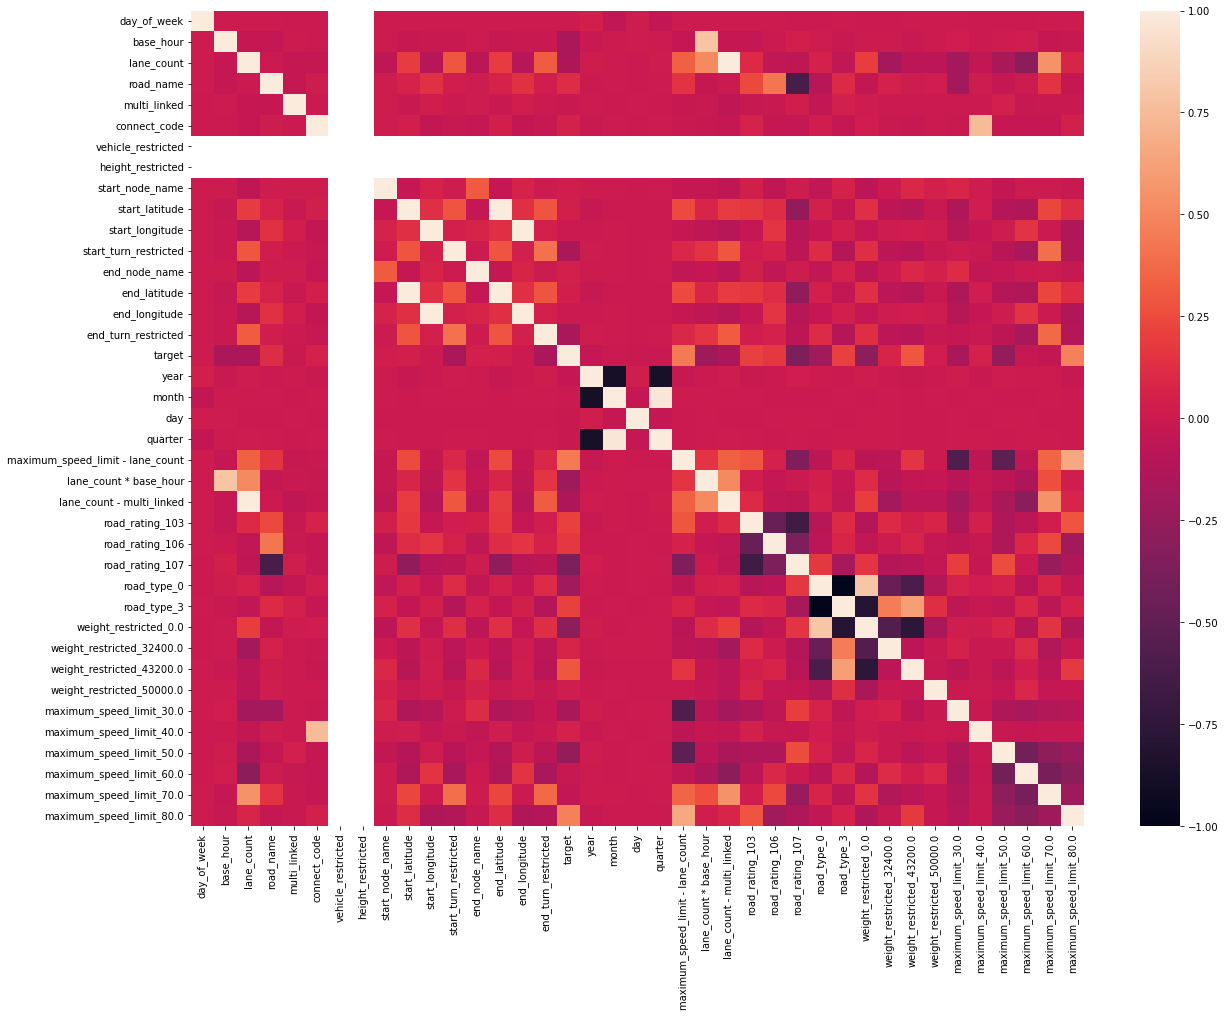

In [13]:
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix)

In [14]:
# see_data = train_label.copy()
# see_test_data = test_label.copy()

In [15]:
# see_data

In [16]:
# see_target_lane_count = see_data.groupby(['maximum_speed_limit', 'road_type', 'lane_count', 'base_hour', 'quarter'])['target'].mean().reset_index()
# see_target_lane_count

In [17]:
# f, ax = plt.subplots(figsize = (20, 15))
# sns.lineplot(data = see_target_lane_count, x = 'base_hour', y = 'target', hue = 'quarter')

In [18]:
# def plot_all(df):
#     f, axes = plt.subplots(2, 2, figsize = (20, 15), sharex = True, sharey = True)
#     f.tight_layout()
#     for n, prod in enumerate(df['quarter'].unique()):
#         plot_df = df.loc[df['quarter'] == prod]
#         sns.lineplot(data = plot_df, x = 'base_hour', y = 'target', hue = 'maximum_speed_limit', style = 'connect_code', ax = axes[n // 2, n% 2])
#         axes[n // 2, n % 2].set_title("quarter: "+ str(prod))

In [19]:
# plot_all(see_data)

In [20]:
X_train_cat = train.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train = train['target'].copy()
X_train_cat

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,lane_count - multi_linked
0,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,2022,6,23,2,59.0,17,1
1,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,2022,7,28,3,58.0,42,2
2,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,2021,10,10,4,78.0,14,2
3,금,13,2,107,태평로,0,0,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,2022,3,11,1,48.0,26,2
4,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,2021,10,5,4,78.0,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,목,16,1,107,-,0,0,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,2021,11,4,4,49.0,16,1
4701213,목,2,2,107,-,0,0,80.0,43200.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,2022,3,31,1,78.0,4,2
4701214,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,2022,6,13,2,58.0,44,2
4701215,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,2021,10,20,4,78.0,4,2


In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from xgboost import XGBRegressor
X_train_label = train_label.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train_label = train_label['target'].copy()
X_train_label

,day_of_week,base_hour,lane_count,road_name,multi_linked,connect_code,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,lane_count - multi_linked,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,weight_restricted_0.0,weight_restricted_32400.0,weight_restricted_43200.0,weight_restricted_50000.0,maximum_speed_limit_30.0,maximum_speed_limit_40.0,maximum_speed_limit_50.0,maximum_speed_limit_60.0,maximum_speed_limit_70.0,maximum_speed_limit_80.0
0,1,17,1,46,0,0,386,33.427747,126.662612,0,386,33.427749,126.662335,0,2022,6,23,2,59.0,17,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,21,2,34,0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,2022,7,28,3,58.0,42,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,7,2,36,0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,2021,10,10,4,78.0,14,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,13,2,57,0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,2022,3,11,1,48.0,26,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6,8,2,35,0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,2021,10,5,4,78.0,16,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,1,0,0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,2021,11,4,4,49.0,16,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4701213,1,2,2,0,0,0,31,33.472505,126.424368,0,31,33.472525,126.424890,0,2022,3,31,1,78.0,4,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4701214,3,22,2,35,0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,2022,6,13,2,58.0,44,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4701215,2,2,2,37,0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,2021,10,20,4,78.0,4,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from xgboost import XGBRegressor
X_train_label = train_label.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train_label = train_label['target'].copy()
X_train_label

,day_of_week,base_hour,lane_count,road_name,multi_linked,connect_code,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,lane_count - multi_linked,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,weight_restricted_0.0,weight_restricted_32400.0,weight_restricted_43200.0,weight_restricted_50000.0,maximum_speed_limit_30.0,maximum_speed_limit_40.0,maximum_speed_limit_50.0,maximum_speed_limit_60.0,maximum_speed_limit_70.0,maximum_speed_limit_80.0
0,1,17,1,46,0,0,386,33.427747,126.662612,0,386,33.427749,126.662335,0,2022,6,23,2,59.0,17,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,21,2,34,0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,2022,7,28,3,58.0,42,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,7,2,36,0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,2021,10,10,4,78.0,14,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,13,2,57,0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,2022,3,11,1,48.0,26,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6,8,2,35,0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,2021,10,5,4,78.0,16,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,1,0,0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,2021,11,4,4,49.0,16,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4701213,1,2,2,0,0,0,31,33.472505,126.424368,0,31,33.472525,126.424890,0,2022,3,31,1,78.0,4,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4701214,3,22,2,35,0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,2022,6,13,2,58.0,44,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4701215,2,2,2,37,0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,2021,10,20,4,78.0,4,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

test_label = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)
X_train_label = scaler.fit_transform(X_train_label)
test_label = scaler.transform(test_label)
# test_label = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)

In [24]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X_train_label, y_train_label, test_size=0.2, random_state = 42)

In [25]:
xgb_model = XGBRegressor(random_state = 42, tree_method = 'gpu_hist',
                         max_depth = 10, 
                         min_child_weight = 2, subsample = 0.9, 
                         colsample_bytree = 0.9, eval_metric = 'mae')
    
xgb_model.fit(X_train_label, y_train_label)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from catboost import CatBoostRegressor
# cat_model = CatBoostRegressor(random_state = 42, iterations = 1500, cat_features = cat_features, early_stopping_rounds = 10, eval_metric = 'MAE')
cat_model = CatBoostRegressor(random_state = 42, eval_metric = 'MAE')
cat_model.fit(X_train_label, y_train_label)

Learning rate set to 0.155736
0:	learn: 12.1568575	total: 402ms	remaining: 6m 42s
1:	learn: 11.2447147	total: 656ms	remaining: 5m 27s
2:	learn: 10.5503480	total: 895ms	remaining: 4m 57s
3:	learn: 9.9139198	total: 1.13s	remaining: 4m 42s
4:	learn: 9.4056745	total: 1.37s	remaining: 4m 31s
5:	learn: 9.0179777	total: 1.62s	remaining: 4m 28s
6:	learn: 8.7067013	total: 1.85s	remaining: 4m 23s
7:	learn: 8.3990313	total: 2.09s	remaining: 4m 19s
8:	learn: 8.1786358	total: 2.33s	remaining: 4m 16s
9:	learn: 7.9813257	total: 2.56s	remaining: 4m 13s
10:	learn: 7.8363493	total: 2.78s	remaining: 4m 10s
11:	learn: 7.6909166	total: 3.03s	remaining: 4m 9s
12:	learn: 7.5330316	total: 3.28s	remaining: 4m 8s
13:	learn: 7.4108659	total: 3.51s	remaining: 4m 7s
14:	learn: 7.3180087	total: 3.74s	remaining: 4m 5s
15:	learn: 7.2117558	total: 3.98s	remaining: 4m 4s
16:	learn: 7.1366024	total: 4.21s	remaining: 4m 3s
17:	learn: 7.0726090	total: 4.44s	remaining: 4m 2s
18:	learn: 7.0096052	total: 4.68s	remaining: 4m 

157:	learn: 4.8548576	total: 37.1s	remaining: 3m 17s
158:	learn: 4.8546365	total: 37.2s	remaining: 3m 17s
159:	learn: 4.8463471	total: 37.5s	remaining: 3m 16s
160:	learn: 4.8411528	total: 37.7s	remaining: 3m 16s
161:	learn: 4.8358927	total: 38s	remaining: 3m 16s
162:	learn: 4.8325006	total: 38.1s	remaining: 3m 15s
163:	learn: 4.8249632	total: 38.4s	remaining: 3m 15s
164:	learn: 4.8233246	total: 38.6s	remaining: 3m 15s
165:	learn: 4.8167489	total: 38.9s	remaining: 3m 15s
166:	learn: 4.8115580	total: 39.1s	remaining: 3m 14s
167:	learn: 4.8034787	total: 39.3s	remaining: 3m 14s
168:	learn: 4.7996050	total: 39.6s	remaining: 3m 14s
169:	learn: 4.7936816	total: 39.8s	remaining: 3m 14s
170:	learn: 4.7884440	total: 40.1s	remaining: 3m 14s
171:	learn: 4.7826864	total: 40.3s	remaining: 3m 14s
172:	learn: 4.7781657	total: 40.6s	remaining: 3m 13s
173:	learn: 4.7750672	total: 40.8s	remaining: 3m 13s
174:	learn: 4.7681777	total: 41.1s	remaining: 3m 13s
175:	learn: 4.7634684	total: 41.3s	remaining: 3m

313:	learn: 4.2692923	total: 1m 14s	remaining: 2m 43s
314:	learn: 4.2660439	total: 1m 15s	remaining: 2m 43s
315:	learn: 4.2635797	total: 1m 15s	remaining: 2m 43s
316:	learn: 4.2608959	total: 1m 15s	remaining: 2m 43s
317:	learn: 4.2582287	total: 1m 15s	remaining: 2m 42s
318:	learn: 4.2555092	total: 1m 16s	remaining: 2m 42s
319:	learn: 4.2523445	total: 1m 16s	remaining: 2m 42s
320:	learn: 4.2499064	total: 1m 16s	remaining: 2m 42s
321:	learn: 4.2484539	total: 1m 16s	remaining: 2m 41s
322:	learn: 4.2466332	total: 1m 17s	remaining: 2m 41s
323:	learn: 4.2447268	total: 1m 17s	remaining: 2m 41s
324:	learn: 4.2419232	total: 1m 17s	remaining: 2m 41s
325:	learn: 4.2388294	total: 1m 17s	remaining: 2m 40s
326:	learn: 4.2364092	total: 1m 18s	remaining: 2m 40s
327:	learn: 4.2355782	total: 1m 18s	remaining: 2m 40s
328:	learn: 4.2349928	total: 1m 18s	remaining: 2m 40s
329:	learn: 4.2327969	total: 1m 18s	remaining: 2m 40s
330:	learn: 4.2309129	total: 1m 19s	remaining: 2m 39s
331:	learn: 4.2273622	total:

465:	learn: 4.0003992	total: 1m 52s	remaining: 2m 8s
466:	learn: 3.9992441	total: 1m 52s	remaining: 2m 8s
467:	learn: 3.9986764	total: 1m 52s	remaining: 2m 7s
468:	learn: 3.9973151	total: 1m 52s	remaining: 2m 7s
469:	learn: 3.9955647	total: 1m 53s	remaining: 2m 7s
470:	learn: 3.9945913	total: 1m 53s	remaining: 2m 7s
471:	learn: 3.9919255	total: 1m 53s	remaining: 2m 7s
472:	learn: 3.9903716	total: 1m 53s	remaining: 2m 6s
473:	learn: 3.9896837	total: 1m 54s	remaining: 2m 6s
474:	learn: 3.9881579	total: 1m 54s	remaining: 2m 6s
475:	learn: 3.9871004	total: 1m 54s	remaining: 2m 6s
476:	learn: 3.9855003	total: 1m 54s	remaining: 2m 5s
477:	learn: 3.9843686	total: 1m 54s	remaining: 2m 5s
478:	learn: 3.9830720	total: 1m 55s	remaining: 2m 5s
479:	learn: 3.9819093	total: 1m 55s	remaining: 2m 5s
480:	learn: 3.9808170	total: 1m 55s	remaining: 2m 4s
481:	learn: 3.9799947	total: 1m 55s	remaining: 2m 4s
482:	learn: 3.9776861	total: 1m 56s	remaining: 2m 4s
483:	learn: 3.9769119	total: 1m 56s	remaining:

619:	learn: 3.8263378	total: 2m 29s	remaining: 1m 31s
620:	learn: 3.8259752	total: 2m 29s	remaining: 1m 31s
621:	learn: 3.8246958	total: 2m 30s	remaining: 1m 31s
622:	learn: 3.8243073	total: 2m 30s	remaining: 1m 30s
623:	learn: 3.8237283	total: 2m 30s	remaining: 1m 30s
624:	learn: 3.8231455	total: 2m 30s	remaining: 1m 30s
625:	learn: 3.8222978	total: 2m 30s	remaining: 1m 30s
626:	learn: 3.8214769	total: 2m 31s	remaining: 1m 29s
627:	learn: 3.8203622	total: 2m 31s	remaining: 1m 29s
628:	learn: 3.8192745	total: 2m 31s	remaining: 1m 29s
629:	learn: 3.8182088	total: 2m 32s	remaining: 1m 29s
630:	learn: 3.8173650	total: 2m 32s	remaining: 1m 29s
631:	learn: 3.8164642	total: 2m 32s	remaining: 1m 28s
632:	learn: 3.8152641	total: 2m 32s	remaining: 1m 28s
633:	learn: 3.8143102	total: 2m 32s	remaining: 1m 28s
634:	learn: 3.8131861	total: 2m 33s	remaining: 1m 28s
635:	learn: 3.8125048	total: 2m 33s	remaining: 1m 27s
636:	learn: 3.8115590	total: 2m 33s	remaining: 1m 27s
637:	learn: 3.8107041	total:

774:	learn: 3.7052530	total: 3m 9s	remaining: 55s
775:	learn: 3.7048200	total: 3m 9s	remaining: 54.8s
776:	learn: 3.7041196	total: 3m 10s	remaining: 54.5s
777:	learn: 3.7035970	total: 3m 10s	remaining: 54.3s
778:	learn: 3.7033341	total: 3m 10s	remaining: 54.1s
779:	learn: 3.7023762	total: 3m 10s	remaining: 53.8s
780:	learn: 3.7019907	total: 3m 11s	remaining: 53.6s
781:	learn: 3.7015685	total: 3m 11s	remaining: 53.4s
782:	learn: 3.7012603	total: 3m 11s	remaining: 53.1s
783:	learn: 3.7005488	total: 3m 11s	remaining: 52.9s
784:	learn: 3.7001838	total: 3m 12s	remaining: 52.6s
785:	learn: 3.6996804	total: 3m 12s	remaining: 52.4s
786:	learn: 3.6987563	total: 3m 12s	remaining: 52.2s
787:	learn: 3.6976606	total: 3m 13s	remaining: 51.9s
788:	learn: 3.6971522	total: 3m 13s	remaining: 51.7s
789:	learn: 3.6966446	total: 3m 13s	remaining: 51.5s
790:	learn: 3.6963996	total: 3m 13s	remaining: 51.2s
791:	learn: 3.6960850	total: 3m 14s	remaining: 51s
792:	learn: 3.6955616	total: 3m 14s	remaining: 50.7s

930:	learn: 3.6169623	total: 3m 48s	remaining: 17s
931:	learn: 3.6164296	total: 3m 49s	remaining: 16.7s
932:	learn: 3.6160243	total: 3m 49s	remaining: 16.5s
933:	learn: 3.6153932	total: 3m 49s	remaining: 16.2s
934:	learn: 3.6149757	total: 3m 49s	remaining: 16s
935:	learn: 3.6139776	total: 3m 50s	remaining: 15.7s
936:	learn: 3.6136274	total: 3m 50s	remaining: 15.5s
937:	learn: 3.6132572	total: 3m 50s	remaining: 15.2s
938:	learn: 3.6125862	total: 3m 50s	remaining: 15s
939:	learn: 3.6119656	total: 3m 50s	remaining: 14.7s
940:	learn: 3.6118254	total: 3m 51s	remaining: 14.5s
941:	learn: 3.6112552	total: 3m 51s	remaining: 14.3s
942:	learn: 3.6106386	total: 3m 51s	remaining: 14s
943:	learn: 3.6101821	total: 3m 52s	remaining: 13.8s
944:	learn: 3.6099167	total: 3m 52s	remaining: 13.5s
945:	learn: 3.6094135	total: 3m 52s	remaining: 13.3s
946:	learn: 3.6089914	total: 3m 52s	remaining: 13s
947:	learn: 3.6085096	total: 3m 52s	remaining: 12.8s
948:	learn: 3.6078422	total: 3m 53s	remaining: 12.5s
949

In [27]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from sklearn.linear_model import Lasso

lasso_model = Lasso(random_state = 42)
lasso_model.fit(X_train_label, y_train_label)

Lasso(random_state=42)

In [28]:
pred_lasso = lasso_model.predict(test_label)
pred_lasso

array([30.25722513, 43.39865185, 45.79527569, ..., 28.61170901,
       36.77572843, 43.7811441 ])

In [29]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(subsample = 0.9, max_depth = 10,
                           random_state = 42)
lgbm_model.fit(X_train_label, y_train_label)

LGBMRegressor(max_depth=10, random_state=42, subsample=0.9)

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from sklearn.ensemble import StackingRegressor, RandomForestRegressor

stacking_model = StackingRegressor(estimators = [('xgb', xgb_model), 
                                                 ('lasso', lasso_model),
                                                 ('cat', cat_model),
                                                 ('lgbm', lgbm_model)], verbose = 1,
                                  final_estimator = RandomForestRegressor(random_state = 42))
stacking_model.fit(X_train_label, y_train_label)

Learning rate set to 0.155736
0:	learn: 12.1568575	total: 244ms	remaining: 4m 3s
1:	learn: 11.2447147	total: 498ms	remaining: 4m 8s
2:	learn: 10.5503480	total: 738ms	remaining: 4m 5s
3:	learn: 9.9139198	total: 973ms	remaining: 4m 2s
4:	learn: 9.4056745	total: 1.21s	remaining: 4m
5:	learn: 9.0179777	total: 1.46s	remaining: 4m 2s
6:	learn: 8.7067013	total: 1.7s	remaining: 4m
7:	learn: 8.3990313	total: 1.94s	remaining: 4m
8:	learn: 8.1786358	total: 2.17s	remaining: 3m 59s
9:	learn: 7.9813257	total: 2.4s	remaining: 3m 57s
10:	learn: 7.8363493	total: 2.62s	remaining: 3m 55s
11:	learn: 7.6909166	total: 2.87s	remaining: 3m 56s
12:	learn: 7.5330316	total: 3.12s	remaining: 3m 56s
13:	learn: 7.4108659	total: 3.35s	remaining: 3m 55s
14:	learn: 7.3180087	total: 3.58s	remaining: 3m 55s
15:	learn: 7.2117558	total: 3.82s	remaining: 3m 54s
16:	learn: 7.1366024	total: 4.05s	remaining: 3m 54s
17:	learn: 7.0726090	total: 4.28s	remaining: 3m 53s
18:	learn: 7.0096052	total: 4.52s	remaining: 3m 53s
19:	lear

157:	learn: 4.8548576	total: 37.3s	remaining: 3m 18s
158:	learn: 4.8546365	total: 37.4s	remaining: 3m 17s
159:	learn: 4.8463471	total: 37.6s	remaining: 3m 17s
160:	learn: 4.8411528	total: 37.9s	remaining: 3m 17s
161:	learn: 4.8358927	total: 38.1s	remaining: 3m 17s
162:	learn: 4.8325006	total: 38.3s	remaining: 3m 16s
163:	learn: 4.8249632	total: 38.6s	remaining: 3m 16s
164:	learn: 4.8233246	total: 38.8s	remaining: 3m 16s
165:	learn: 4.8167489	total: 39s	remaining: 3m 16s
166:	learn: 4.8115580	total: 39.3s	remaining: 3m 15s
167:	learn: 4.8034787	total: 39.5s	remaining: 3m 15s
168:	learn: 4.7996050	total: 39.8s	remaining: 3m 15s
169:	learn: 4.7936816	total: 40s	remaining: 3m 15s
170:	learn: 4.7884440	total: 40.3s	remaining: 3m 15s
171:	learn: 4.7826864	total: 40.5s	remaining: 3m 14s
172:	learn: 4.7781657	total: 40.7s	remaining: 3m 14s
173:	learn: 4.7750672	total: 41s	remaining: 3m 14s
174:	learn: 4.7681777	total: 41.3s	remaining: 3m 14s
175:	learn: 4.7634684	total: 41.5s	remaining: 3m 14s

313:	learn: 4.2692923	total: 1m 15s	remaining: 2m 44s
314:	learn: 4.2660439	total: 1m 15s	remaining: 2m 44s
315:	learn: 4.2635797	total: 1m 15s	remaining: 2m 43s
316:	learn: 4.2608959	total: 1m 15s	remaining: 2m 43s
317:	learn: 4.2582287	total: 1m 16s	remaining: 2m 43s
318:	learn: 4.2555092	total: 1m 16s	remaining: 2m 43s
319:	learn: 4.2523445	total: 1m 16s	remaining: 2m 42s
320:	learn: 4.2499064	total: 1m 16s	remaining: 2m 42s
321:	learn: 4.2484539	total: 1m 17s	remaining: 2m 42s
322:	learn: 4.2466332	total: 1m 17s	remaining: 2m 42s
323:	learn: 4.2447268	total: 1m 17s	remaining: 2m 42s
324:	learn: 4.2419232	total: 1m 17s	remaining: 2m 41s
325:	learn: 4.2388294	total: 1m 18s	remaining: 2m 41s
326:	learn: 4.2364092	total: 1m 18s	remaining: 2m 41s
327:	learn: 4.2355782	total: 1m 18s	remaining: 2m 41s
328:	learn: 4.2349928	total: 1m 18s	remaining: 2m 40s
329:	learn: 4.2327969	total: 1m 19s	remaining: 2m 40s
330:	learn: 4.2309129	total: 1m 19s	remaining: 2m 40s
331:	learn: 4.2273622	total:

465:	learn: 4.0003992	total: 1m 52s	remaining: 2m 8s
466:	learn: 3.9992441	total: 1m 52s	remaining: 2m 8s
467:	learn: 3.9986764	total: 1m 52s	remaining: 2m 8s
468:	learn: 3.9973151	total: 1m 53s	remaining: 2m 8s
469:	learn: 3.9955647	total: 1m 53s	remaining: 2m 7s
470:	learn: 3.9945913	total: 1m 53s	remaining: 2m 7s
471:	learn: 3.9919255	total: 1m 53s	remaining: 2m 7s
472:	learn: 3.9903716	total: 1m 54s	remaining: 2m 7s
473:	learn: 3.9896837	total: 1m 54s	remaining: 2m 6s
474:	learn: 3.9881579	total: 1m 54s	remaining: 2m 6s
475:	learn: 3.9871004	total: 1m 54s	remaining: 2m 6s
476:	learn: 3.9855003	total: 1m 55s	remaining: 2m 6s
477:	learn: 3.9843686	total: 1m 55s	remaining: 2m 5s
478:	learn: 3.9830720	total: 1m 55s	remaining: 2m 5s
479:	learn: 3.9819093	total: 1m 55s	remaining: 2m 5s
480:	learn: 3.9808170	total: 1m 56s	remaining: 2m 5s
481:	learn: 3.9799947	total: 1m 56s	remaining: 2m 4s
482:	learn: 3.9776861	total: 1m 56s	remaining: 2m 4s
483:	learn: 3.9769119	total: 1m 56s	remaining:

619:	learn: 3.8263378	total: 2m 29s	remaining: 1m 31s
620:	learn: 3.8259752	total: 2m 30s	remaining: 1m 31s
621:	learn: 3.8246958	total: 2m 30s	remaining: 1m 31s
622:	learn: 3.8243073	total: 2m 30s	remaining: 1m 31s
623:	learn: 3.8237283	total: 2m 30s	remaining: 1m 30s
624:	learn: 3.8231455	total: 2m 31s	remaining: 1m 30s
625:	learn: 3.8222978	total: 2m 31s	remaining: 1m 30s
626:	learn: 3.8214769	total: 2m 31s	remaining: 1m 30s
627:	learn: 3.8203622	total: 2m 31s	remaining: 1m 30s
628:	learn: 3.8192745	total: 2m 32s	remaining: 1m 29s
629:	learn: 3.8182088	total: 2m 32s	remaining: 1m 29s
630:	learn: 3.8173650	total: 2m 32s	remaining: 1m 29s
631:	learn: 3.8164642	total: 2m 32s	remaining: 1m 29s
632:	learn: 3.8152641	total: 2m 33s	remaining: 1m 28s
633:	learn: 3.8143102	total: 2m 33s	remaining: 1m 28s
634:	learn: 3.8131861	total: 2m 33s	remaining: 1m 28s
635:	learn: 3.8125048	total: 2m 33s	remaining: 1m 28s
636:	learn: 3.8115590	total: 2m 34s	remaining: 1m 27s
637:	learn: 3.8107041	total:

773:	learn: 3.7057505	total: 3m 7s	remaining: 54.9s
774:	learn: 3.7052530	total: 3m 8s	remaining: 54.6s
775:	learn: 3.7048200	total: 3m 8s	remaining: 54.4s
776:	learn: 3.7041196	total: 3m 8s	remaining: 54.1s
777:	learn: 3.7035970	total: 3m 8s	remaining: 53.9s
778:	learn: 3.7033341	total: 3m 9s	remaining: 53.6s
779:	learn: 3.7023762	total: 3m 9s	remaining: 53.4s
780:	learn: 3.7019907	total: 3m 9s	remaining: 53.2s
781:	learn: 3.7015685	total: 3m 9s	remaining: 52.9s
782:	learn: 3.7012603	total: 3m 10s	remaining: 52.7s
783:	learn: 3.7005488	total: 3m 10s	remaining: 52.4s
784:	learn: 3.7001838	total: 3m 10s	remaining: 52.2s
785:	learn: 3.6996804	total: 3m 10s	remaining: 51.9s
786:	learn: 3.6987563	total: 3m 11s	remaining: 51.7s
787:	learn: 3.6976606	total: 3m 11s	remaining: 51.5s
788:	learn: 3.6971522	total: 3m 11s	remaining: 51.2s
789:	learn: 3.6966446	total: 3m 11s	remaining: 51s
790:	learn: 3.6963996	total: 3m 12s	remaining: 50.7s
791:	learn: 3.6960850	total: 3m 12s	remaining: 50.5s
792:

929:	learn: 3.6175660	total: 3m 46s	remaining: 17s
930:	learn: 3.6169623	total: 3m 46s	remaining: 16.8s
931:	learn: 3.6164296	total: 3m 46s	remaining: 16.5s
932:	learn: 3.6160243	total: 3m 46s	remaining: 16.3s
933:	learn: 3.6153932	total: 3m 47s	remaining: 16s
934:	learn: 3.6149757	total: 3m 47s	remaining: 15.8s
935:	learn: 3.6139776	total: 3m 47s	remaining: 15.6s
936:	learn: 3.6136274	total: 3m 47s	remaining: 15.3s
937:	learn: 3.6132572	total: 3m 48s	remaining: 15.1s
938:	learn: 3.6125862	total: 3m 48s	remaining: 14.8s
939:	learn: 3.6119656	total: 3m 48s	remaining: 14.6s
940:	learn: 3.6118254	total: 3m 48s	remaining: 14.3s
941:	learn: 3.6112552	total: 3m 49s	remaining: 14.1s
942:	learn: 3.6106386	total: 3m 49s	remaining: 13.9s
943:	learn: 3.6101821	total: 3m 49s	remaining: 13.6s
944:	learn: 3.6099167	total: 3m 49s	remaining: 13.4s
945:	learn: 3.6094135	total: 3m 50s	remaining: 13.1s
946:	learn: 3.6089914	total: 3m 50s	remaining: 12.9s
947:	learn: 3.6085096	total: 3m 50s	remaining: 12.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Learning rate set to 0.150341
0:	learn: 12.1698611	total: 196ms	remaining: 3m 16s
1:	learn: 11.2800566	total: 401ms	remaining: 3m 20s
2:	learn: 10.5880504	total: 597ms	remaining: 3m 18s
3:	learn: 10.0017488	total: 805ms	remaining: 3m 20s
4:	learn: 9.5078928	total: 1.02s	remaining: 3m 22s
5:	learn: 9.0927983	total: 1.21s	remaining: 3m 21s
6:	learn: 8.7457316	total: 1.42s	remaining: 3m 21s
7:	learn: 8.4733682	total: 1.6s	remaining: 3m 18s
8:	learn: 8.2423370	total: 1.78s	remaining: 3m 16s
9:	learn: 8.0122148	total: 1.99s	remaining: 3m 16s
10:	learn: 7.8638953	total: 2.17s	remaining: 3m 14s
11:	learn: 7.7201124	total: 2.36s	remaining: 3m 14s
12:	learn: 7.5832032	total: 2.55s	remaining: 3m 13s
13:	learn: 7.4682915	total: 2.73s	remaining: 3m 11s
14:	learn: 7.3482667	total: 2.91s	remaining: 3m 11s
15:	learn: 7.2701503	total: 3.1s	remaining: 3m 10s
16:	learn: 7.1906096	total: 3.29s	remaining: 3m 10s
17:	learn: 7.1190706	total: 3.47s	remaining: 3m 9s
18:	learn: 7.0596993	total: 3.65s	remaining

158:	learn: 4.8488449	total: 29.7s	remaining: 2m 37s
159:	learn: 4.8409969	total: 29.9s	remaining: 2m 37s
160:	learn: 4.8359097	total: 30.1s	remaining: 2m 36s
161:	learn: 4.8308044	total: 30.3s	remaining: 2m 36s
162:	learn: 4.8270563	total: 30.5s	remaining: 2m 36s
163:	learn: 4.8213029	total: 30.7s	remaining: 2m 36s
164:	learn: 4.8168108	total: 30.9s	remaining: 2m 36s
165:	learn: 4.8125523	total: 31s	remaining: 2m 35s
166:	learn: 4.8076042	total: 31.2s	remaining: 2m 35s
167:	learn: 4.8008252	total: 31.4s	remaining: 2m 35s
168:	learn: 4.7970000	total: 31.6s	remaining: 2m 35s
169:	learn: 4.7954415	total: 31.8s	remaining: 2m 35s
170:	learn: 4.7909075	total: 32s	remaining: 2m 35s
171:	learn: 4.7847343	total: 32.2s	remaining: 2m 34s
172:	learn: 4.7790802	total: 32.4s	remaining: 2m 34s
173:	learn: 4.7770264	total: 32.6s	remaining: 2m 34s
174:	learn: 4.7707642	total: 32.8s	remaining: 2m 34s
175:	learn: 4.7646246	total: 33s	remaining: 2m 34s
176:	learn: 4.7625109	total: 33.2s	remaining: 2m 34s

314:	learn: 4.3040195	total: 59.9s	remaining: 2m 10s
315:	learn: 4.3029811	total: 1m	remaining: 2m 9s
316:	learn: 4.2996687	total: 1m	remaining: 2m 9s
317:	learn: 4.2967643	total: 1m	remaining: 2m 9s
318:	learn: 4.2946945	total: 1m	remaining: 2m 9s
319:	learn: 4.2926310	total: 1m	remaining: 2m 9s
320:	learn: 4.2905540	total: 1m 1s	remaining: 2m 9s
321:	learn: 4.2886460	total: 1m 1s	remaining: 2m 8s
322:	learn: 4.2862462	total: 1m 1s	remaining: 2m 8s
323:	learn: 4.2844709	total: 1m 1s	remaining: 2m 8s
324:	learn: 4.2826357	total: 1m 1s	remaining: 2m 8s
325:	learn: 4.2780420	total: 1m 1s	remaining: 2m 8s
326:	learn: 4.2756150	total: 1m 2s	remaining: 2m 7s
327:	learn: 4.2731235	total: 1m 2s	remaining: 2m 7s
328:	learn: 4.2704893	total: 1m 2s	remaining: 2m 7s
329:	learn: 4.2677217	total: 1m 2s	remaining: 2m 7s
330:	learn: 4.2652714	total: 1m 2s	remaining: 2m 7s
331:	learn: 4.2634904	total: 1m 3s	remaining: 2m 7s
332:	learn: 4.2611191	total: 1m 3s	remaining: 2m 6s
333:	learn: 4.2584497	tota

469:	learn: 4.0219704	total: 1m 29s	remaining: 1m 41s
470:	learn: 4.0203093	total: 1m 30s	remaining: 1m 41s
471:	learn: 4.0193069	total: 1m 30s	remaining: 1m 40s
472:	learn: 4.0176077	total: 1m 30s	remaining: 1m 40s
473:	learn: 4.0164922	total: 1m 30s	remaining: 1m 40s
474:	learn: 4.0152603	total: 1m 30s	remaining: 1m 40s
475:	learn: 4.0132719	total: 1m 31s	remaining: 1m 40s
476:	learn: 4.0127756	total: 1m 31s	remaining: 1m 40s
477:	learn: 4.0118773	total: 1m 31s	remaining: 1m 39s
478:	learn: 4.0102318	total: 1m 31s	remaining: 1m 39s
479:	learn: 4.0089578	total: 1m 31s	remaining: 1m 39s
480:	learn: 4.0073319	total: 1m 32s	remaining: 1m 39s
481:	learn: 4.0061318	total: 1m 32s	remaining: 1m 39s
482:	learn: 4.0045449	total: 1m 32s	remaining: 1m 38s
483:	learn: 4.0036903	total: 1m 32s	remaining: 1m 38s
484:	learn: 4.0028458	total: 1m 32s	remaining: 1m 38s
485:	learn: 4.0008431	total: 1m 33s	remaining: 1m 38s
486:	learn: 4.0000819	total: 1m 33s	remaining: 1m 38s
487:	learn: 3.9984818	total:

622:	learn: 3.8507206	total: 1m 59s	remaining: 1m 12s
623:	learn: 3.8502498	total: 2m	remaining: 1m 12s
624:	learn: 3.8494121	total: 2m	remaining: 1m 12s
625:	learn: 3.8484697	total: 2m	remaining: 1m 11s
626:	learn: 3.8476788	total: 2m	remaining: 1m 11s
627:	learn: 3.8470979	total: 2m	remaining: 1m 11s
628:	learn: 3.8463059	total: 2m	remaining: 1m 11s
629:	learn: 3.8453571	total: 2m 1s	remaining: 1m 11s
630:	learn: 3.8445860	total: 2m 1s	remaining: 1m 10s
631:	learn: 3.8436283	total: 2m 1s	remaining: 1m 10s
632:	learn: 3.8425902	total: 2m 1s	remaining: 1m 10s
633:	learn: 3.8412410	total: 2m 1s	remaining: 1m 10s
634:	learn: 3.8408882	total: 2m 2s	remaining: 1m 10s
635:	learn: 3.8402879	total: 2m 2s	remaining: 1m 10s
636:	learn: 3.8395197	total: 2m 2s	remaining: 1m 9s
637:	learn: 3.8385029	total: 2m 2s	remaining: 1m 9s
638:	learn: 3.8378407	total: 2m 2s	remaining: 1m 9s
639:	learn: 3.8367607	total: 2m 3s	remaining: 1m 9s
640:	learn: 3.8357126	total: 2m 3s	remaining: 1m 9s
641:	learn: 3.8

780:	learn: 3.7314762	total: 2m 30s	remaining: 42.2s
781:	learn: 3.7309581	total: 2m 30s	remaining: 42s
782:	learn: 3.7303173	total: 2m 30s	remaining: 41.8s
783:	learn: 3.7296272	total: 2m 31s	remaining: 41.6s
784:	learn: 3.7291198	total: 2m 31s	remaining: 41.5s
785:	learn: 3.7289995	total: 2m 31s	remaining: 41.3s
786:	learn: 3.7285605	total: 2m 31s	remaining: 41.1s
787:	learn: 3.7279999	total: 2m 31s	remaining: 40.9s
788:	learn: 3.7272368	total: 2m 32s	remaining: 40.7s
789:	learn: 3.7267056	total: 2m 32s	remaining: 40.5s
790:	learn: 3.7260076	total: 2m 32s	remaining: 40.3s
791:	learn: 3.7257236	total: 2m 32s	remaining: 40.1s
792:	learn: 3.7250403	total: 2m 32s	remaining: 39.9s
793:	learn: 3.7245424	total: 2m 33s	remaining: 39.7s
794:	learn: 3.7238509	total: 2m 33s	remaining: 39.5s
795:	learn: 3.7231703	total: 2m 33s	remaining: 39.3s
796:	learn: 3.7227122	total: 2m 33s	remaining: 39.1s
797:	learn: 3.7221008	total: 2m 33s	remaining: 39s
798:	learn: 3.7217807	total: 2m 34s	remaining: 38.

937:	learn: 3.6504066	total: 3m 1s	remaining: 12s
938:	learn: 3.6501118	total: 3m 1s	remaining: 11.8s
939:	learn: 3.6496336	total: 3m 1s	remaining: 11.6s
940:	learn: 3.6491579	total: 3m 1s	remaining: 11.4s
941:	learn: 3.6487855	total: 3m 1s	remaining: 11.2s
942:	learn: 3.6483739	total: 3m 2s	remaining: 11s
943:	learn: 3.6478783	total: 3m 2s	remaining: 10.8s
944:	learn: 3.6473351	total: 3m 2s	remaining: 10.6s
945:	learn: 3.6470581	total: 3m 2s	remaining: 10.4s
946:	learn: 3.6466917	total: 3m 2s	remaining: 10.2s
947:	learn: 3.6463242	total: 3m 3s	remaining: 10s
948:	learn: 3.6459508	total: 3m 3s	remaining: 9.85s
949:	learn: 3.6454809	total: 3m 3s	remaining: 9.65s
950:	learn: 3.6448917	total: 3m 3s	remaining: 9.46s
951:	learn: 3.6444930	total: 3m 3s	remaining: 9.27s
952:	learn: 3.6441755	total: 3m 4s	remaining: 9.08s
953:	learn: 3.6436545	total: 3m 4s	remaining: 8.88s
954:	learn: 3.6432951	total: 3m 4s	remaining: 8.69s
955:	learn: 3.6428613	total: 3m 4s	remaining: 8.5s
956:	learn: 3.64235

96:	learn: 5.3326841	total: 17.8s	remaining: 2m 46s
97:	learn: 5.3231556	total: 18s	remaining: 2m 45s
98:	learn: 5.3158733	total: 18.2s	remaining: 2m 45s
99:	learn: 5.3091990	total: 18.4s	remaining: 2m 45s
100:	learn: 5.3006043	total: 18.6s	remaining: 2m 45s
101:	learn: 5.2907073	total: 18.8s	remaining: 2m 45s
102:	learn: 5.2780621	total: 19s	remaining: 2m 45s
103:	learn: 5.2696132	total: 19.2s	remaining: 2m 45s
104:	learn: 5.2591919	total: 19.4s	remaining: 2m 45s
105:	learn: 5.2515230	total: 19.6s	remaining: 2m 45s
106:	learn: 5.2423158	total: 19.8s	remaining: 2m 44s
107:	learn: 5.2278446	total: 19.9s	remaining: 2m 44s
108:	learn: 5.2130045	total: 20.2s	remaining: 2m 44s
109:	learn: 5.2055148	total: 20.3s	remaining: 2m 44s
110:	learn: 5.1983578	total: 20.5s	remaining: 2m 44s
111:	learn: 5.1895282	total: 20.7s	remaining: 2m 44s
112:	learn: 5.1828226	total: 20.9s	remaining: 2m 44s
113:	learn: 5.1750609	total: 21.1s	remaining: 2m 44s
114:	learn: 5.1699472	total: 21.3s	remaining: 2m 43s
1

252:	learn: 4.4764053	total: 47.9s	remaining: 2m 21s
253:	learn: 4.4745654	total: 48.1s	remaining: 2m 21s
254:	learn: 4.4708124	total: 48.3s	remaining: 2m 21s
255:	learn: 4.4682185	total: 48.5s	remaining: 2m 20s
256:	learn: 4.4667675	total: 48.7s	remaining: 2m 20s
257:	learn: 4.4621960	total: 48.9s	remaining: 2m 20s
258:	learn: 4.4581297	total: 49.1s	remaining: 2m 20s
259:	learn: 4.4538612	total: 49.3s	remaining: 2m 20s
260:	learn: 4.4504055	total: 49.5s	remaining: 2m 20s
261:	learn: 4.4477474	total: 49.7s	remaining: 2m 19s
262:	learn: 4.4426968	total: 49.9s	remaining: 2m 19s
263:	learn: 4.4404541	total: 50.1s	remaining: 2m 19s
264:	learn: 4.4365945	total: 50.3s	remaining: 2m 19s
265:	learn: 4.4337039	total: 50.5s	remaining: 2m 19s
266:	learn: 4.4307968	total: 50.7s	remaining: 2m 19s
267:	learn: 4.4296043	total: 50.9s	remaining: 2m 18s
268:	learn: 4.4242242	total: 51.1s	remaining: 2m 18s
269:	learn: 4.4196268	total: 51.3s	remaining: 2m 18s
270:	learn: 4.4165363	total: 51.5s	remaining: 

408:	learn: 4.1139505	total: 1m 18s	remaining: 1m 53s
409:	learn: 4.1126669	total: 1m 18s	remaining: 1m 53s
410:	learn: 4.1110854	total: 1m 18s	remaining: 1m 53s
411:	learn: 4.1089781	total: 1m 19s	remaining: 1m 52s
412:	learn: 4.1076318	total: 1m 19s	remaining: 1m 52s
413:	learn: 4.1052371	total: 1m 19s	remaining: 1m 52s
414:	learn: 4.1039054	total: 1m 19s	remaining: 1m 52s
415:	learn: 4.1016920	total: 1m 19s	remaining: 1m 52s
416:	learn: 4.0992393	total: 1m 20s	remaining: 1m 52s
417:	learn: 4.0979334	total: 1m 20s	remaining: 1m 51s
418:	learn: 4.0957908	total: 1m 20s	remaining: 1m 51s
419:	learn: 4.0938078	total: 1m 20s	remaining: 1m 51s
420:	learn: 4.0923815	total: 1m 20s	remaining: 1m 51s
421:	learn: 4.0908946	total: 1m 21s	remaining: 1m 51s
422:	learn: 4.0893609	total: 1m 21s	remaining: 1m 50s
423:	learn: 4.0876222	total: 1m 21s	remaining: 1m 50s
424:	learn: 4.0848202	total: 1m 21s	remaining: 1m 50s
425:	learn: 4.0836527	total: 1m 21s	remaining: 1m 50s
426:	learn: 4.0815184	total:

561:	learn: 3.9030693	total: 1m 48s	remaining: 1m 24s
562:	learn: 3.9020613	total: 1m 48s	remaining: 1m 24s
563:	learn: 3.9008139	total: 1m 49s	remaining: 1m 24s
564:	learn: 3.8996927	total: 1m 49s	remaining: 1m 24s
565:	learn: 3.8989633	total: 1m 49s	remaining: 1m 23s
566:	learn: 3.8982916	total: 1m 49s	remaining: 1m 23s
567:	learn: 3.8973247	total: 1m 49s	remaining: 1m 23s
568:	learn: 3.8969757	total: 1m 49s	remaining: 1m 23s
569:	learn: 3.8959327	total: 1m 50s	remaining: 1m 23s
570:	learn: 3.8948011	total: 1m 50s	remaining: 1m 22s
571:	learn: 3.8934541	total: 1m 50s	remaining: 1m 22s
572:	learn: 3.8915321	total: 1m 50s	remaining: 1m 22s
573:	learn: 3.8898104	total: 1m 51s	remaining: 1m 22s
574:	learn: 3.8884032	total: 1m 51s	remaining: 1m 22s
575:	learn: 3.8873956	total: 1m 51s	remaining: 1m 21s
576:	learn: 3.8860076	total: 1m 51s	remaining: 1m 21s
577:	learn: 3.8852758	total: 1m 51s	remaining: 1m 21s
578:	learn: 3.8844558	total: 1m 51s	remaining: 1m 21s
579:	learn: 3.8834543	total:

716:	learn: 3.7698081	total: 2m 19s	remaining: 55s
717:	learn: 3.7692410	total: 2m 19s	remaining: 54.8s
718:	learn: 3.7685019	total: 2m 19s	remaining: 54.6s
719:	learn: 3.7678688	total: 2m 19s	remaining: 54.4s
720:	learn: 3.7675124	total: 2m 20s	remaining: 54.2s
721:	learn: 3.7670822	total: 2m 20s	remaining: 54s
722:	learn: 3.7660521	total: 2m 20s	remaining: 53.9s
723:	learn: 3.7649027	total: 2m 20s	remaining: 53.7s
724:	learn: 3.7642318	total: 2m 20s	remaining: 53.5s
725:	learn: 3.7634190	total: 2m 21s	remaining: 53.3s
726:	learn: 3.7626627	total: 2m 21s	remaining: 53.1s
727:	learn: 3.7620257	total: 2m 21s	remaining: 52.9s
728:	learn: 3.7614826	total: 2m 21s	remaining: 52.7s
729:	learn: 3.7609456	total: 2m 21s	remaining: 52.5s
730:	learn: 3.7591824	total: 2m 22s	remaining: 52.3s
731:	learn: 3.7587763	total: 2m 22s	remaining: 52.1s
732:	learn: 3.7581375	total: 2m 22s	remaining: 51.9s
733:	learn: 3.7576608	total: 2m 22s	remaining: 51.7s
734:	learn: 3.7566486	total: 2m 22s	remaining: 51.

872:	learn: 3.6718599	total: 2m 50s	remaining: 24.7s
873:	learn: 3.6713143	total: 2m 50s	remaining: 24.5s
874:	learn: 3.6709552	total: 2m 50s	remaining: 24.4s
875:	learn: 3.6705738	total: 2m 50s	remaining: 24.2s
876:	learn: 3.6701091	total: 2m 50s	remaining: 24s
877:	learn: 3.6695258	total: 2m 51s	remaining: 23.8s
878:	learn: 3.6689147	total: 2m 51s	remaining: 23.6s
879:	learn: 3.6683996	total: 2m 51s	remaining: 23.4s
880:	learn: 3.6678949	total: 2m 51s	remaining: 23.2s
881:	learn: 3.6675353	total: 2m 51s	remaining: 23s
882:	learn: 3.6672211	total: 2m 52s	remaining: 22.8s
883:	learn: 3.6668204	total: 2m 52s	remaining: 22.6s
884:	learn: 3.6658865	total: 2m 52s	remaining: 22.4s
885:	learn: 3.6654595	total: 2m 52s	remaining: 22.2s
886:	learn: 3.6651564	total: 2m 52s	remaining: 22s
887:	learn: 3.6644093	total: 2m 53s	remaining: 21.8s
888:	learn: 3.6640564	total: 2m 53s	remaining: 21.6s
889:	learn: 3.6636412	total: 2m 53s	remaining: 21.4s
890:	learn: 3.6634162	total: 2m 53s	remaining: 21.2s

29:	learn: 6.4620774	total: 5.67s	remaining: 3m 3s
30:	learn: 6.4283390	total: 5.85s	remaining: 3m 2s
31:	learn: 6.3982229	total: 6.02s	remaining: 3m 2s
32:	learn: 6.3609188	total: 6.21s	remaining: 3m 1s
33:	learn: 6.3308007	total: 6.39s	remaining: 3m 1s
34:	learn: 6.3046574	total: 6.57s	remaining: 3m 1s
35:	learn: 6.2716612	total: 6.75s	remaining: 3m
36:	learn: 6.2519356	total: 6.91s	remaining: 2m 59s
37:	learn: 6.2341620	total: 7.09s	remaining: 2m 59s
38:	learn: 6.2072140	total: 7.27s	remaining: 2m 59s
39:	learn: 6.1838254	total: 7.45s	remaining: 2m 58s
40:	learn: 6.1479680	total: 7.64s	remaining: 2m 58s
41:	learn: 6.1121277	total: 7.83s	remaining: 2m 58s
42:	learn: 6.0853290	total: 8.03s	remaining: 2m 58s
43:	learn: 6.0660489	total: 8.22s	remaining: 2m 58s
44:	learn: 6.0493083	total: 8.4s	remaining: 2m 58s
45:	learn: 6.0270886	total: 8.6s	remaining: 2m 58s
46:	learn: 6.0054598	total: 8.78s	remaining: 2m 58s
47:	learn: 5.9792627	total: 8.96s	remaining: 2m 57s
48:	learn: 5.9623521	tot

187:	learn: 4.6904372	total: 35.7s	remaining: 2m 34s
188:	learn: 4.6839178	total: 35.9s	remaining: 2m 34s
189:	learn: 4.6795670	total: 36.1s	remaining: 2m 33s
190:	learn: 4.6743819	total: 36.3s	remaining: 2m 33s
191:	learn: 4.6711627	total: 36.5s	remaining: 2m 33s
192:	learn: 4.6675732	total: 36.7s	remaining: 2m 33s
193:	learn: 4.6634515	total: 36.9s	remaining: 2m 33s
194:	learn: 4.6592519	total: 37.1s	remaining: 2m 33s
195:	learn: 4.6568579	total: 37.2s	remaining: 2m 32s
196:	learn: 4.6555537	total: 37.4s	remaining: 2m 32s
197:	learn: 4.6517533	total: 37.6s	remaining: 2m 32s
198:	learn: 4.6476203	total: 37.8s	remaining: 2m 32s
199:	learn: 4.6442073	total: 38s	remaining: 2m 31s
200:	learn: 4.6411357	total: 38.2s	remaining: 2m 31s
201:	learn: 4.6401062	total: 38.4s	remaining: 2m 31s
202:	learn: 4.6367288	total: 38.5s	remaining: 2m 31s
203:	learn: 4.6315277	total: 38.7s	remaining: 2m 31s
204:	learn: 4.6278680	total: 38.9s	remaining: 2m 31s
205:	learn: 4.6238907	total: 39.1s	remaining: 2m

343:	learn: 4.2255523	total: 1m 6s	remaining: 2m 5s
344:	learn: 4.2240986	total: 1m 6s	remaining: 2m 5s
345:	learn: 4.2207797	total: 1m 6s	remaining: 2m 5s
346:	learn: 4.2178825	total: 1m 6s	remaining: 2m 5s
347:	learn: 4.2160084	total: 1m 6s	remaining: 2m 5s
348:	learn: 4.2141419	total: 1m 7s	remaining: 2m 4s
349:	learn: 4.2108435	total: 1m 7s	remaining: 2m 4s
350:	learn: 4.2083790	total: 1m 7s	remaining: 2m 4s
351:	learn: 4.2066760	total: 1m 7s	remaining: 2m 4s
352:	learn: 4.2039608	total: 1m 7s	remaining: 2m 4s
353:	learn: 4.2018357	total: 1m 8s	remaining: 2m 4s
354:	learn: 4.1977687	total: 1m 8s	remaining: 2m 3s
355:	learn: 4.1950491	total: 1m 8s	remaining: 2m 3s
356:	learn: 4.1929351	total: 1m 8s	remaining: 2m 3s
357:	learn: 4.1898496	total: 1m 8s	remaining: 2m 3s
358:	learn: 4.1879183	total: 1m 9s	remaining: 2m 3s
359:	learn: 4.1857454	total: 1m 9s	remaining: 2m 3s
360:	learn: 4.1833606	total: 1m 9s	remaining: 2m 2s
361:	learn: 4.1814598	total: 1m 9s	remaining: 2m 2s
362:	learn: 

497:	learn: 3.9726570	total: 1m 36s	remaining: 1m 36s
498:	learn: 3.9720557	total: 1m 36s	remaining: 1m 36s
499:	learn: 3.9713626	total: 1m 36s	remaining: 1m 36s
500:	learn: 3.9695756	total: 1m 36s	remaining: 1m 36s
501:	learn: 3.9682576	total: 1m 37s	remaining: 1m 36s
502:	learn: 3.9671648	total: 1m 37s	remaining: 1m 36s
503:	learn: 3.9662729	total: 1m 37s	remaining: 1m 35s
504:	learn: 3.9646624	total: 1m 37s	remaining: 1m 35s
505:	learn: 3.9637345	total: 1m 37s	remaining: 1m 35s
506:	learn: 3.9623962	total: 1m 37s	remaining: 1m 35s
507:	learn: 3.9620475	total: 1m 38s	remaining: 1m 35s
508:	learn: 3.9613486	total: 1m 38s	remaining: 1m 34s
509:	learn: 3.9600729	total: 1m 38s	remaining: 1m 34s
510:	learn: 3.9596160	total: 1m 38s	remaining: 1m 34s
511:	learn: 3.9575802	total: 1m 38s	remaining: 1m 34s
512:	learn: 3.9566823	total: 1m 39s	remaining: 1m 34s
513:	learn: 3.9557136	total: 1m 39s	remaining: 1m 33s
514:	learn: 3.9539513	total: 1m 39s	remaining: 1m 33s
515:	learn: 3.9528839	total:

650:	learn: 3.8256957	total: 2m 5s	remaining: 1m 7s
651:	learn: 3.8251859	total: 2m 6s	remaining: 1m 7s
652:	learn: 3.8239307	total: 2m 6s	remaining: 1m 7s
653:	learn: 3.8232119	total: 2m 6s	remaining: 1m 6s
654:	learn: 3.8222191	total: 2m 6s	remaining: 1m 6s
655:	learn: 3.8216301	total: 2m 6s	remaining: 1m 6s
656:	learn: 3.8210582	total: 2m 7s	remaining: 1m 6s
657:	learn: 3.8200884	total: 2m 7s	remaining: 1m 6s
658:	learn: 3.8198156	total: 2m 7s	remaining: 1m 6s
659:	learn: 3.8185876	total: 2m 7s	remaining: 1m 5s
660:	learn: 3.8178968	total: 2m 7s	remaining: 1m 5s
661:	learn: 3.8167578	total: 2m 8s	remaining: 1m 5s
662:	learn: 3.8155274	total: 2m 8s	remaining: 1m 5s
663:	learn: 3.8152460	total: 2m 8s	remaining: 1m 5s
664:	learn: 3.8141831	total: 2m 8s	remaining: 1m 4s
665:	learn: 3.8133776	total: 2m 8s	remaining: 1m 4s
666:	learn: 3.8127336	total: 2m 9s	remaining: 1m 4s
667:	learn: 3.8124795	total: 2m 9s	remaining: 1m 4s
668:	learn: 3.8122415	total: 2m 9s	remaining: 1m 4s
669:	learn: 

806:	learn: 3.7137449	total: 2m 36s	remaining: 37.4s
807:	learn: 3.7133035	total: 2m 36s	remaining: 37.2s
808:	learn: 3.7126987	total: 2m 36s	remaining: 37s
809:	learn: 3.7122899	total: 2m 37s	remaining: 36.8s
810:	learn: 3.7117507	total: 2m 37s	remaining: 36.7s
811:	learn: 3.7112035	total: 2m 37s	remaining: 36.5s
812:	learn: 3.7108199	total: 2m 37s	remaining: 36.3s
813:	learn: 3.7098451	total: 2m 37s	remaining: 36.1s
814:	learn: 3.7091544	total: 2m 38s	remaining: 35.9s
815:	learn: 3.7087128	total: 2m 38s	remaining: 35.7s
816:	learn: 3.7075800	total: 2m 38s	remaining: 35.5s
817:	learn: 3.7067828	total: 2m 38s	remaining: 35.3s
818:	learn: 3.7063407	total: 2m 38s	remaining: 35.1s
819:	learn: 3.7055582	total: 2m 39s	remaining: 34.9s
820:	learn: 3.7046144	total: 2m 39s	remaining: 34.7s
821:	learn: 3.7042958	total: 2m 39s	remaining: 34.5s
822:	learn: 3.7035833	total: 2m 39s	remaining: 34.3s
823:	learn: 3.7030799	total: 2m 39s	remaining: 34.1s
824:	learn: 3.7024896	total: 2m 40s	remaining: 3

963:	learn: 3.6317715	total: 3m 7s	remaining: 7s
964:	learn: 3.6313727	total: 3m 7s	remaining: 6.81s
965:	learn: 3.6310467	total: 3m 7s	remaining: 6.62s
966:	learn: 3.6306626	total: 3m 8s	remaining: 6.42s
967:	learn: 3.6300135	total: 3m 8s	remaining: 6.23s
968:	learn: 3.6295705	total: 3m 8s	remaining: 6.03s
969:	learn: 3.6291496	total: 3m 8s	remaining: 5.84s
970:	learn: 3.6287972	total: 3m 8s	remaining: 5.64s
971:	learn: 3.6283260	total: 3m 9s	remaining: 5.45s
972:	learn: 3.6277875	total: 3m 9s	remaining: 5.25s
973:	learn: 3.6273443	total: 3m 9s	remaining: 5.06s
974:	learn: 3.6270809	total: 3m 9s	remaining: 4.86s
975:	learn: 3.6268625	total: 3m 9s	remaining: 4.67s
976:	learn: 3.6265369	total: 3m 10s	remaining: 4.47s
977:	learn: 3.6262027	total: 3m 10s	remaining: 4.28s
978:	learn: 3.6257189	total: 3m 10s	remaining: 4.08s
979:	learn: 3.6252972	total: 3m 10s	remaining: 3.89s
980:	learn: 3.6243335	total: 3m 10s	remaining: 3.69s
981:	learn: 3.6238125	total: 3m 11s	remaining: 3.5s
982:	learn

122:	learn: 5.0965128	total: 23s	remaining: 2m 43s
123:	learn: 5.0883635	total: 23.2s	remaining: 2m 43s
124:	learn: 5.0830680	total: 23.3s	remaining: 2m 43s
125:	learn: 5.0753067	total: 23.5s	remaining: 2m 43s
126:	learn: 5.0717092	total: 23.7s	remaining: 2m 42s
127:	learn: 5.0641632	total: 23.9s	remaining: 2m 42s
128:	learn: 5.0572071	total: 24.1s	remaining: 2m 42s
129:	learn: 5.0533017	total: 24.3s	remaining: 2m 42s
130:	learn: 5.0436106	total: 24.5s	remaining: 2m 42s
131:	learn: 5.0371514	total: 24.7s	remaining: 2m 42s
132:	learn: 5.0319332	total: 24.9s	remaining: 2m 42s
133:	learn: 5.0295830	total: 25.1s	remaining: 2m 41s
134:	learn: 5.0222221	total: 25.3s	remaining: 2m 41s
135:	learn: 5.0140605	total: 25.5s	remaining: 2m 41s
136:	learn: 5.0035768	total: 25.7s	remaining: 2m 41s
137:	learn: 4.9941257	total: 25.9s	remaining: 2m 41s
138:	learn: 4.9900853	total: 26s	remaining: 2m 41s
139:	learn: 4.9824132	total: 26.2s	remaining: 2m 41s
140:	learn: 4.9750041	total: 26.4s	remaining: 2m 4

279:	learn: 4.3791701	total: 53.7s	remaining: 2m 18s
280:	learn: 4.3767647	total: 53.9s	remaining: 2m 17s
281:	learn: 4.3749288	total: 54.1s	remaining: 2m 17s
282:	learn: 4.3719795	total: 54.3s	remaining: 2m 17s
283:	learn: 4.3708731	total: 54.5s	remaining: 2m 17s
284:	learn: 4.3686949	total: 54.7s	remaining: 2m 17s
285:	learn: 4.3666493	total: 54.9s	remaining: 2m 16s
286:	learn: 4.3649924	total: 55s	remaining: 2m 16s
287:	learn: 4.3616755	total: 55.2s	remaining: 2m 16s
288:	learn: 4.3597304	total: 55.4s	remaining: 2m 16s
289:	learn: 4.3581572	total: 55.6s	remaining: 2m 16s
290:	learn: 4.3547261	total: 55.8s	remaining: 2m 15s
291:	learn: 4.3506644	total: 56s	remaining: 2m 15s
292:	learn: 4.3469248	total: 56.2s	remaining: 2m 15s
293:	learn: 4.3440663	total: 56.4s	remaining: 2m 15s
294:	learn: 4.3428302	total: 56.6s	remaining: 2m 15s
295:	learn: 4.3391891	total: 56.8s	remaining: 2m 15s
296:	learn: 4.3358974	total: 57s	remaining: 2m 14s
297:	learn: 4.3341166	total: 57.2s	remaining: 2m 14s

434:	learn: 4.0708216	total: 1m 24s	remaining: 1m 49s
435:	learn: 4.0700213	total: 1m 24s	remaining: 1m 48s
436:	learn: 4.0684154	total: 1m 24s	remaining: 1m 48s
437:	learn: 4.0668346	total: 1m 24s	remaining: 1m 48s
438:	learn: 4.0645780	total: 1m 24s	remaining: 1m 48s
439:	learn: 4.0631798	total: 1m 25s	remaining: 1m 48s
440:	learn: 4.0617167	total: 1m 25s	remaining: 1m 48s
441:	learn: 4.0605590	total: 1m 25s	remaining: 1m 47s
442:	learn: 4.0588996	total: 1m 25s	remaining: 1m 47s
443:	learn: 4.0575310	total: 1m 25s	remaining: 1m 47s
444:	learn: 4.0554594	total: 1m 26s	remaining: 1m 47s
445:	learn: 4.0540020	total: 1m 26s	remaining: 1m 47s
446:	learn: 4.0525033	total: 1m 26s	remaining: 1m 46s
447:	learn: 4.0503316	total: 1m 26s	remaining: 1m 46s
448:	learn: 4.0488835	total: 1m 26s	remaining: 1m 46s
449:	learn: 4.0484036	total: 1m 27s	remaining: 1m 46s
450:	learn: 4.0461231	total: 1m 27s	remaining: 1m 46s
451:	learn: 4.0443757	total: 1m 27s	remaining: 1m 45s
452:	learn: 4.0421662	total:

586:	learn: 3.8831105	total: 1m 53s	remaining: 1m 20s
587:	learn: 3.8825220	total: 1m 53s	remaining: 1m 19s
588:	learn: 3.8810879	total: 1m 54s	remaining: 1m 19s
589:	learn: 3.8797724	total: 1m 54s	remaining: 1m 19s
590:	learn: 3.8790956	total: 1m 54s	remaining: 1m 19s
591:	learn: 3.8779912	total: 1m 54s	remaining: 1m 19s
592:	learn: 3.8773692	total: 1m 54s	remaining: 1m 18s
593:	learn: 3.8763173	total: 1m 55s	remaining: 1m 18s
594:	learn: 3.8753951	total: 1m 55s	remaining: 1m 18s
595:	learn: 3.8746758	total: 1m 55s	remaining: 1m 18s
596:	learn: 3.8737997	total: 1m 55s	remaining: 1m 18s
597:	learn: 3.8729593	total: 1m 55s	remaining: 1m 17s
598:	learn: 3.8726092	total: 1m 56s	remaining: 1m 17s
599:	learn: 3.8718491	total: 1m 56s	remaining: 1m 17s
600:	learn: 3.8709591	total: 1m 56s	remaining: 1m 17s
601:	learn: 3.8704880	total: 1m 56s	remaining: 1m 17s
602:	learn: 3.8693178	total: 1m 56s	remaining: 1m 16s
603:	learn: 3.8684633	total: 1m 57s	remaining: 1m 16s
604:	learn: 3.8679170	total:

742:	learn: 3.7556238	total: 2m 24s	remaining: 49.9s
743:	learn: 3.7549285	total: 2m 24s	remaining: 49.7s
744:	learn: 3.7546288	total: 2m 24s	remaining: 49.5s
745:	learn: 3.7541835	total: 2m 24s	remaining: 49.3s
746:	learn: 3.7527623	total: 2m 25s	remaining: 49.1s
747:	learn: 3.7521658	total: 2m 25s	remaining: 48.9s
748:	learn: 3.7513215	total: 2m 25s	remaining: 48.7s
749:	learn: 3.7506374	total: 2m 25s	remaining: 48.5s
750:	learn: 3.7496633	total: 2m 25s	remaining: 48.4s
751:	learn: 3.7487566	total: 2m 26s	remaining: 48.2s
752:	learn: 3.7479811	total: 2m 26s	remaining: 48s
753:	learn: 3.7474962	total: 2m 26s	remaining: 47.8s
754:	learn: 3.7469088	total: 2m 26s	remaining: 47.6s
755:	learn: 3.7460810	total: 2m 26s	remaining: 47.4s
756:	learn: 3.7446475	total: 2m 27s	remaining: 47.2s
757:	learn: 3.7441104	total: 2m 27s	remaining: 47s
758:	learn: 3.7436684	total: 2m 27s	remaining: 46.8s
759:	learn: 3.7432687	total: 2m 27s	remaining: 46.6s
760:	learn: 3.7427719	total: 2m 27s	remaining: 46.

898:	learn: 3.6664703	total: 2m 54s	remaining: 19.6s
899:	learn: 3.6660865	total: 2m 55s	remaining: 19.4s
900:	learn: 3.6655433	total: 2m 55s	remaining: 19.2s
901:	learn: 3.6649066	total: 2m 55s	remaining: 19.1s
902:	learn: 3.6643676	total: 2m 55s	remaining: 18.9s
903:	learn: 3.6637308	total: 2m 55s	remaining: 18.7s
904:	learn: 3.6633281	total: 2m 56s	remaining: 18.5s
905:	learn: 3.6630296	total: 2m 56s	remaining: 18.3s
906:	learn: 3.6622150	total: 2m 56s	remaining: 18.1s
907:	learn: 3.6616031	total: 2m 56s	remaining: 17.9s
908:	learn: 3.6612233	total: 2m 56s	remaining: 17.7s
909:	learn: 3.6608655	total: 2m 56s	remaining: 17.5s
910:	learn: 3.6604404	total: 2m 57s	remaining: 17.3s
911:	learn: 3.6598805	total: 2m 57s	remaining: 17.1s
912:	learn: 3.6594747	total: 2m 57s	remaining: 16.9s
913:	learn: 3.6589271	total: 2m 57s	remaining: 16.7s
914:	learn: 3.6585490	total: 2m 57s	remaining: 16.5s
915:	learn: 3.6579839	total: 2m 58s	remaining: 16.3s
916:	learn: 3.6576758	total: 2m 58s	remaining:

56:	learn: 5.8506185	total: 10.5s	remaining: 2m 53s
57:	learn: 5.8164476	total: 10.7s	remaining: 2m 53s
58:	learn: 5.7924429	total: 10.9s	remaining: 2m 53s
59:	learn: 5.7794216	total: 11.1s	remaining: 2m 53s
60:	learn: 5.7698439	total: 11.2s	remaining: 2m 52s
61:	learn: 5.7568603	total: 11.4s	remaining: 2m 52s
62:	learn: 5.7473635	total: 11.5s	remaining: 2m 51s
63:	learn: 5.7246842	total: 11.7s	remaining: 2m 51s
64:	learn: 5.7082209	total: 11.9s	remaining: 2m 51s
65:	learn: 5.6921653	total: 12.1s	remaining: 2m 51s
66:	learn: 5.6772534	total: 12.3s	remaining: 2m 50s
67:	learn: 5.6692650	total: 12.5s	remaining: 2m 50s
68:	learn: 5.6572487	total: 12.6s	remaining: 2m 50s
69:	learn: 5.6451358	total: 12.8s	remaining: 2m 50s
70:	learn: 5.6289675	total: 13s	remaining: 2m 50s
71:	learn: 5.6126308	total: 13.2s	remaining: 2m 49s
72:	learn: 5.6012405	total: 13.4s	remaining: 2m 49s
73:	learn: 5.5816425	total: 13.5s	remaining: 2m 49s
74:	learn: 5.5737955	total: 13.7s	remaining: 2m 49s
75:	learn: 5.5

212:	learn: 4.6380985	total: 40.3s	remaining: 2m 28s
213:	learn: 4.6351804	total: 40.5s	remaining: 2m 28s
214:	learn: 4.6318927	total: 40.7s	remaining: 2m 28s
215:	learn: 4.6235401	total: 40.9s	remaining: 2m 28s
216:	learn: 4.6204650	total: 41.1s	remaining: 2m 28s
217:	learn: 4.6136977	total: 41.3s	remaining: 2m 28s
218:	learn: 4.6092269	total: 41.5s	remaining: 2m 27s
219:	learn: 4.6024076	total: 41.7s	remaining: 2m 27s
220:	learn: 4.5992785	total: 41.9s	remaining: 2m 27s
221:	learn: 4.5954839	total: 42.1s	remaining: 2m 27s
222:	learn: 4.5909340	total: 42.3s	remaining: 2m 27s
223:	learn: 4.5878526	total: 42.5s	remaining: 2m 27s
224:	learn: 4.5850399	total: 42.6s	remaining: 2m 26s
225:	learn: 4.5824320	total: 42.8s	remaining: 2m 26s
226:	learn: 4.5778928	total: 43s	remaining: 2m 26s
227:	learn: 4.5750788	total: 43.2s	remaining: 2m 26s
228:	learn: 4.5715916	total: 43.4s	remaining: 2m 26s
229:	learn: 4.5642031	total: 43.6s	remaining: 2m 26s
230:	learn: 4.5585477	total: 43.8s	remaining: 2m

369:	learn: 4.1913625	total: 1m 10s	remaining: 2m
370:	learn: 4.1902248	total: 1m 11s	remaining: 2m
371:	learn: 4.1879496	total: 1m 11s	remaining: 2m
372:	learn: 4.1855732	total: 1m 11s	remaining: 2m
373:	learn: 4.1849594	total: 1m 11s	remaining: 2m
374:	learn: 4.1822743	total: 1m 11s	remaining: 1m 59s
375:	learn: 4.1801629	total: 1m 12s	remaining: 1m 59s
376:	learn: 4.1787685	total: 1m 12s	remaining: 1m 59s
377:	learn: 4.1769244	total: 1m 12s	remaining: 1m 59s
378:	learn: 4.1755458	total: 1m 12s	remaining: 1m 59s
379:	learn: 4.1733370	total: 1m 12s	remaining: 1m 59s
380:	learn: 4.1720069	total: 1m 13s	remaining: 1m 58s
381:	learn: 4.1694574	total: 1m 13s	remaining: 1m 58s
382:	learn: 4.1677435	total: 1m 13s	remaining: 1m 58s
383:	learn: 4.1645611	total: 1m 13s	remaining: 1m 58s
384:	learn: 4.1629467	total: 1m 13s	remaining: 1m 58s
385:	learn: 4.1619728	total: 1m 14s	remaining: 1m 57s
386:	learn: 4.1601825	total: 1m 14s	remaining: 1m 57s
387:	learn: 4.1578340	total: 1m 14s	remaining: 1

522:	learn: 3.9637478	total: 1m 40s	remaining: 1m 32s
523:	learn: 3.9607527	total: 1m 41s	remaining: 1m 31s
524:	learn: 3.9598063	total: 1m 41s	remaining: 1m 31s
525:	learn: 3.9588775	total: 1m 41s	remaining: 1m 31s
526:	learn: 3.9571373	total: 1m 41s	remaining: 1m 31s
527:	learn: 3.9563162	total: 1m 41s	remaining: 1m 31s
528:	learn: 3.9550536	total: 1m 42s	remaining: 1m 30s
529:	learn: 3.9531294	total: 1m 42s	remaining: 1m 30s
530:	learn: 3.9524253	total: 1m 42s	remaining: 1m 30s
531:	learn: 3.9513749	total: 1m 42s	remaining: 1m 30s
532:	learn: 3.9504116	total: 1m 42s	remaining: 1m 30s
533:	learn: 3.9481098	total: 1m 43s	remaining: 1m 30s
534:	learn: 3.9473509	total: 1m 43s	remaining: 1m 29s
535:	learn: 3.9466009	total: 1m 43s	remaining: 1m 29s
536:	learn: 3.9447325	total: 1m 43s	remaining: 1m 29s
537:	learn: 3.9436356	total: 1m 43s	remaining: 1m 29s
538:	learn: 3.9428178	total: 1m 44s	remaining: 1m 29s
539:	learn: 3.9412700	total: 1m 44s	remaining: 1m 28s
540:	learn: 3.9391237	total:

677:	learn: 3.8154049	total: 2m 11s	remaining: 1m 2s
678:	learn: 3.8147907	total: 2m 11s	remaining: 1m 2s
679:	learn: 3.8141823	total: 2m 11s	remaining: 1m 2s
680:	learn: 3.8135669	total: 2m 12s	remaining: 1m 1s
681:	learn: 3.8126769	total: 2m 12s	remaining: 1m 1s
682:	learn: 3.8117490	total: 2m 12s	remaining: 1m 1s
683:	learn: 3.8109159	total: 2m 12s	remaining: 1m 1s
684:	learn: 3.8102424	total: 2m 12s	remaining: 1m 1s
685:	learn: 3.8096148	total: 2m 12s	remaining: 1m
686:	learn: 3.8087172	total: 2m 13s	remaining: 1m
687:	learn: 3.8081561	total: 2m 13s	remaining: 1m
688:	learn: 3.8070499	total: 2m 13s	remaining: 1m
689:	learn: 3.8063735	total: 2m 13s	remaining: 1m
690:	learn: 3.8054128	total: 2m 13s	remaining: 59.9s
691:	learn: 3.8044224	total: 2m 14s	remaining: 59.7s
692:	learn: 3.8037384	total: 2m 14s	remaining: 59.5s
693:	learn: 3.8030427	total: 2m 14s	remaining: 59.4s
694:	learn: 3.8019305	total: 2m 14s	remaining: 59.2s
695:	learn: 3.8010169	total: 2m 15s	remaining: 59s
696:	learn

834:	learn: 3.7083969	total: 2m 42s	remaining: 32.1s
835:	learn: 3.7081943	total: 2m 42s	remaining: 31.9s
836:	learn: 3.7078040	total: 2m 42s	remaining: 31.7s
837:	learn: 3.7070381	total: 2m 43s	remaining: 31.5s
838:	learn: 3.7068222	total: 2m 43s	remaining: 31.3s
839:	learn: 3.7063580	total: 2m 43s	remaining: 31.1s
840:	learn: 3.7060769	total: 2m 43s	remaining: 30.9s
841:	learn: 3.7058056	total: 2m 43s	remaining: 30.7s
842:	learn: 3.7054350	total: 2m 43s	remaining: 30.5s
843:	learn: 3.7049621	total: 2m 44s	remaining: 30.3s
844:	learn: 3.7044586	total: 2m 44s	remaining: 30.1s
845:	learn: 3.7040348	total: 2m 44s	remaining: 30s
846:	learn: 3.7035187	total: 2m 44s	remaining: 29.8s
847:	learn: 3.7028457	total: 2m 45s	remaining: 29.6s
848:	learn: 3.7025181	total: 2m 45s	remaining: 29.4s
849:	learn: 3.7019530	total: 2m 45s	remaining: 29.2s
850:	learn: 3.7015186	total: 2m 45s	remaining: 29s
851:	learn: 3.7011270	total: 2m 45s	remaining: 28.8s
852:	learn: 3.7002857	total: 2m 45s	remaining: 28.

992:	learn: 3.6360681	total: 3m 13s	remaining: 1.36s
993:	learn: 3.6355810	total: 3m 13s	remaining: 1.17s
994:	learn: 3.6350522	total: 3m 13s	remaining: 974ms
995:	learn: 3.6346473	total: 3m 13s	remaining: 779ms
996:	learn: 3.6341661	total: 3m 14s	remaining: 584ms
997:	learn: 3.6333549	total: 3m 14s	remaining: 389ms
998:	learn: 3.6328642	total: 3m 14s	remaining: 195ms
999:	learn: 3.6322963	total: 3m 14s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


MemoryError: could not allocate 469762048 bytes

In [ ]:
pred_xgb = xgb_model.predict(test_label)
pred_xgb

In [ ]:
pred_cat = cat_model.predict(test_label)
pred_cat

In [ ]:
pred_lasso = lasso_model.predict(test_label)
pred_lasso

In [ ]:
pred_lgbm = lgbm_model.predict(test_label)
pred_lgbm

In [ ]:
pred_stacking = stacking_model.predict(test_label)
pred_stacking

In [ ]:
# feature_importance = xgb.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# fig = plt.figure(figsize=(20, 15))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(test_xgb.columns)[sorted_idx])
# plt.title('Feature Importance')

In [ ]:
stacking = pd.DataFrame({'id' : test.id, 'target':pred_stacking})
stacking.to_csv('stacking.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
voting = pd.DataFrame({'id' : test.id, 'target':(pred_xgb + pred_cat + pred_lgbm + pred_lasso) / 4})
voting.to_csv('voting.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
stacking

In [ ]:
voting